## Description

This example file runs a simple Monte Carlo simulation. It uses RunModel to call a Python script that sums 3 independent standard normal random variables.

Author: Michael D. Shields  
Date: December 9, 2018

## Required files

To run this example, the following files must be present in the same directory as this Jupyter script:

1) python_model_class.py
2) python_model_function.py     

In [1]:
from UQpy.SampleMethods import MCS
from UQpy.RunModel import RunModel
import matplotlib.pyplot as plt
import time

## Sample generation

Use the MCS class to generate 10,000 random samples.

In [2]:
# Call MCS to generate samples
x_mcs = MCS(dist_name=['Normal','Normal','Normal'], dist_params=[[0,1],[0,1],[0,1]], nsamples=10000) 

print("\n3D N(0,1) random samples.")
print(x_mcs.samples)


3D N(0,1) random samples.
[[ 1.32481664  1.49445501  1.69202224]
 [ 1.44204324  0.33978152 -0.15927249]
 [ 0.16738862 -0.7087116   0.00882049]
 ...
 [-0.14387312  1.82865109 -0.91715281]
 [-0.24221774  0.92808286 -1.02292996]
 [ 0.98773213  0.85773606  0.67901899]]


## Call to RunModel - Class example

This example uses a Python model where the model is defined as a class. The model is in the Python script 'python_model_class.py'

### Serial Execution


Time for serial execution:
0.27726292610168457


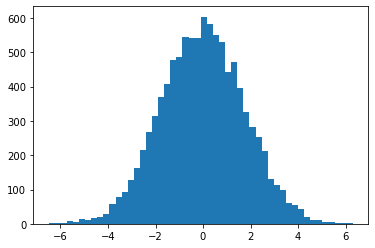

In [3]:
t = time.time()
m = RunModel(samples=x_mcs.samples, model_script='python_model_class.py', model_object_name="SumRVs")
t_ser_python = time.time() - t
print("\nTime for serial execution:")
print(t_ser_python)

plt.hist(m.qoi_list,50)
plt.show()

### Parallel Execution


Time for parallel execution:
0.9514021873474121


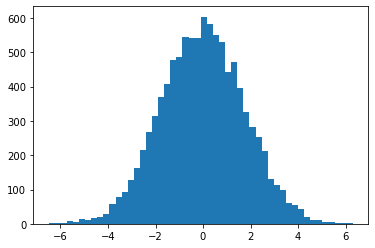

In [4]:
t = time.time()
m = RunModel(samples=x_mcs.samples, model_script='python_model_class.py', model_object_name="SumRVs", ntasks=4)
t_par_python = time.time() - t
print("\nTime for parallel execution:")
print(t_par_python)

plt.hist(m.qoi_list,50)
plt.show()

## Call to RunModel - function example

This example uses a Python model where the model is defined as a function. The model is in the Python script 'python_model_function.py'.

### Serial Execution


Time for serial execution:
0.2703101634979248


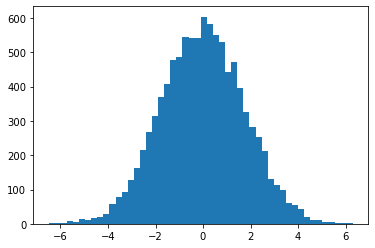

In [5]:
t = time.time()
m = RunModel(samples=x_mcs.samples, model_script='python_model_function.py', model_object_name="sum_rvs")
t_ser_python_func = time.time() - t
print("\nTime for serial execution:")
print(t_ser_python_func)

plt.hist(m.qoi_list,50)
plt.show()

### Parallel Execution


Time for parallel execution:
0.978736162185669


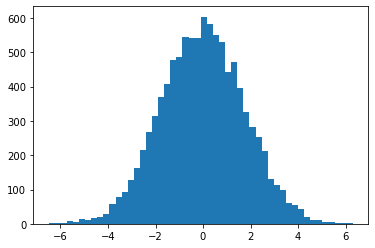

In [6]:
t = time.time()
m = RunModel(samples=x_mcs.samples, model_script='python_model_function.py', model_object_name="sum_rvs", ntasks=4)
t_par_python_func = time.time() - t
print("\nTime for parallel execution:")
print(t_par_python_func)

plt.hist(m.qoi_list,50)
plt.show()